In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import NaiveMean, ExponentialSmoothing, NaiveMovingAverage, NaiveSeasonal, NaiveDrift
from darts.metrics import mape, mae

In [1]:
PREDICT_N_POINTS = 24

In [2]:
train_df = pd.read_csv('./data/train.csv')
df_sorted = train_df.sort_values('week')

# Extract a single timeseries

In [ ]:
# Pick a random combination of meal_id and center_id
random_combination = train_df[['meal_id', 'center_id']].drop_duplicates().sample(n=1).values[0]
random_meal_id, random_center_id = random_combination

# print(random_combination)

# Filter the data for the selected combination
filtered_df = train_df[(train_df['meal_id'] == random_meal_id) & (train_df['center_id'] == random_center_id)]

# print(filtered_df)

# Sort the filtered data by date
filtered_df = filtered_df.sort_values('week')

# # Create a Darts TimeSeries
ts = TimeSeries.from_dataframe(filtered_df, 'week', 'num_orders', freq=1, fill_missing_dates=True, fillna_value=0)

In [6]:
# tss = TimeSeries.from_group_dataframe(
#     df_sorted,
#     ['center_id', 'meal_id'],
#     time_col='week',
#     value_cols=['num_orders'],
#     # static_cols=['checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured'],
#     fill_missing_dates=True,
#     fillna_value=0,
#     freq=1
# )

## Baseline models

In [7]:
naive_mean_model = NaiveMean()
naive_seasonal_model = NaiveSeasonal()
naive_moving_average_model = NaiveMovingAverage()
naive_drift_model = NaiveDrift()

naive_mean_model.fit(ts)
naive_moving_average_model.fit(ts)
naive_seasonal_model.fit(ts)
naive_drift_model.fit(ts)

predictions_naive_mean = naive_mean_model.predict(PREDICT_N_POINTS)
predictions_naive_moving_average = naive_moving_average_model.predict(PREDICT_N_POINTS)
predictions_naive_seasonal = naive_seasonal_model.predict(PREDICT_N_POINTS)
predictions_naive_drift = naive_drift_model.predict(PREDICT_N_POINTS)

NaiveDrift()

## Exponential Smoothing

In [ ]:
exp_smooth_model = ExponentialSmoothing()
exp_smooth_model.fit(ts)

predictions_exp_smoothing = exp_smooth_model.predict(PREDICT_N_POINTS)

## ARIMA

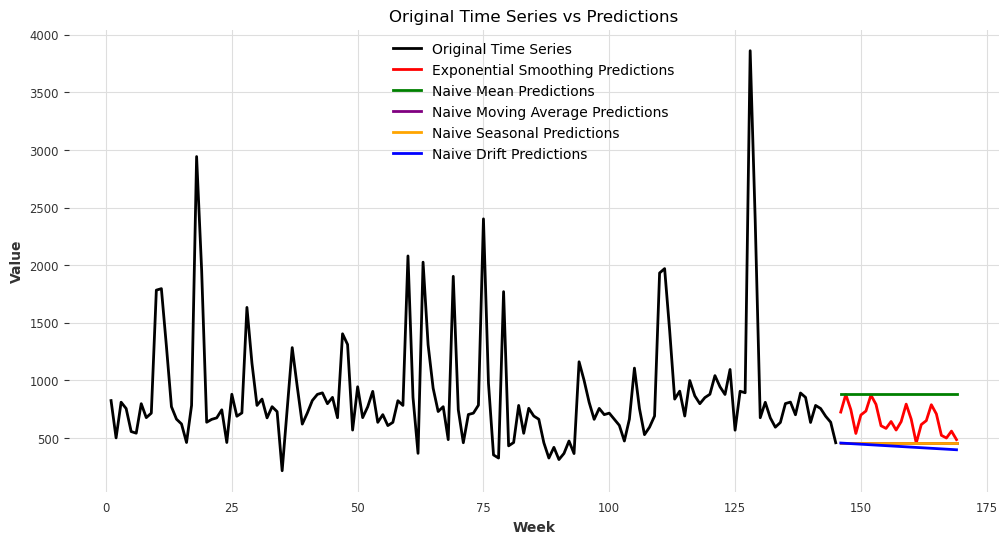

In [9]:
plt.figure(figsize=(12, 6))
ts.plot(label='Original Time Series')
predictions_naive_mean.plot(label='Naive Mean Predictions', color='green')
predictions_naive_moving_average.plot(label='Naive Moving Average Predictions', color='purple')
predictions_naive_seasonal.plot(label='Naive Seasonal Predictions', color='orange')
predictions_naive_drift.plot(label='Naive Drift Predictions', color='blue')
plt.title('Original Time Series vs Predictions')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()